In [1]:
# Importing files
from pandas_datareader import data # to get data from online yahoo finance
import matplotlib.pyplot as plt # for plotting 
import pandas as pd # for datasets and data management 
import numpy as np # for calculations 
from sklearn import linear_model # for regression models
from sklearn.metrics import mean_squared_error # for error analysis 
from math import sqrt # for simple math calc

In [2]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean

def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

In [3]:
class LinRegMachineLearner:
    def __init__(self):
        pass
    
    def train(self,x , y):
        regr = linear_model.LinearRegression()
        regr.fit(x[:, np.newaxis], y[:, np.newaxis])
        self.coef = regr.coef_
        self.int = regr.intercept_
        print "Training done."
    
    def predict(self,x):
        print "Prediction done."
        regr = linear_model.LinearRegression()
        regr.coef_ = self.coef
        regr.intercept_ = self.int
        result = regr.predict(x[:, np.newaxis])
        result = np.squeeze(result)
        return result

In [9]:
tr_startdate = '2017-01-01'
tr_enddate = '2017-01-31'
test_start = '2017-03-01'
test_end = '2017-03-15'

appleDf = getDataYahoo('AAPL',tr_startdate,tr_enddate,'Adj Close')
apple = appleDf.as_matrix()

spyDf = getDataYahoo('SPY',tr_startdate,tr_enddate,'Adj Close')
spy = spyDf.as_matrix()

In [27]:
print appleDf
print apple
print spy

2017-01-02    114.722694
2017-01-03    114.722694
2017-01-04    114.594292
2017-01-05    115.177040
2017-01-06    116.461075
2017-01-09    117.527794
2017-01-10    117.646317
2017-01-11    118.278458
2017-01-12    117.784599
2017-01-13    117.577179
2017-01-16    117.577179
2017-01-17    118.525383
2017-01-18    118.515503
2017-01-19    118.308083
2017-01-20    118.525383
2017-01-23    118.604401
2017-01-24    118.495758
2017-01-25    120.382278
2017-01-26    120.441551
2017-01-27    120.451416
2017-01-30    120.135345
2017-01-31    119.858795
Freq: B, Name: Adj Close, dtype: float64
[ 114.722694  114.722694  114.594292  115.17704   116.461075  117.527794
  117.646317  118.278458  117.784599  117.577179  117.577179  118.525383
  118.515503  118.308083  118.525383  118.604401  118.495758  120.382278
  120.441551  120.451416  120.135345  119.858795]
[ 222.073914  222.073914  223.395081  223.217606  224.01622   223.276779
  223.276779  223.907761  223.345779  223.858475  223.858475  223.0

In [12]:
test_appleDf = getDataYahoo('AAPL',test_start,test_end,'Adj Close')
test_apple = test_appleDf.as_matrix()

test_spyDf = getDataYahoo('SPY',test_start,test_end,'Adj Close')
test_spy = test_spyDf.as_matrix()

In [14]:
print test_apple
print test_spy

[ 138.670807  137.847473  138.660889  138.224426  138.402985  137.887146
  137.569687  138.026016  138.085541  137.877228  139.335464]
[ 236.409515  234.920761  235.068665  234.368622  233.66861   233.234802
  233.530579  234.348923  234.467224  233.570007  235.591202]


In [15]:
bhavyamachine = LinRegMachineLearner()
bhavyamachine.train(spy,apple)


Training done.


In [17]:
bhavya = bhavyamachine.predict(test_spy)

Prediction done.


In [19]:
print bhavya

[ 133.26394997  131.45355157  131.63341014  130.78212327  129.9308741
  129.40334215  129.76302159  130.75816832  130.90202818  129.81096799
  132.26884094]


In [24]:
df=pd.DataFrame({'trueapple':test_apple, 'predictedapple':bhavya})

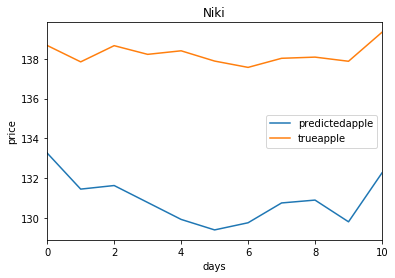

In [26]:

plotData(df,"Niki","days","price" )